K-Means vs. Hierarchical vs. DBSCAN

 Data loaded successfully.


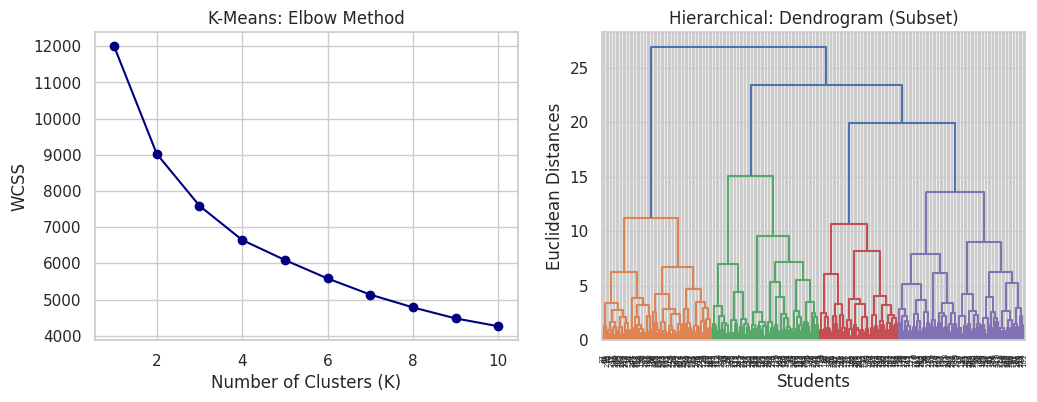

--- Running DBSCAN Analysis ---


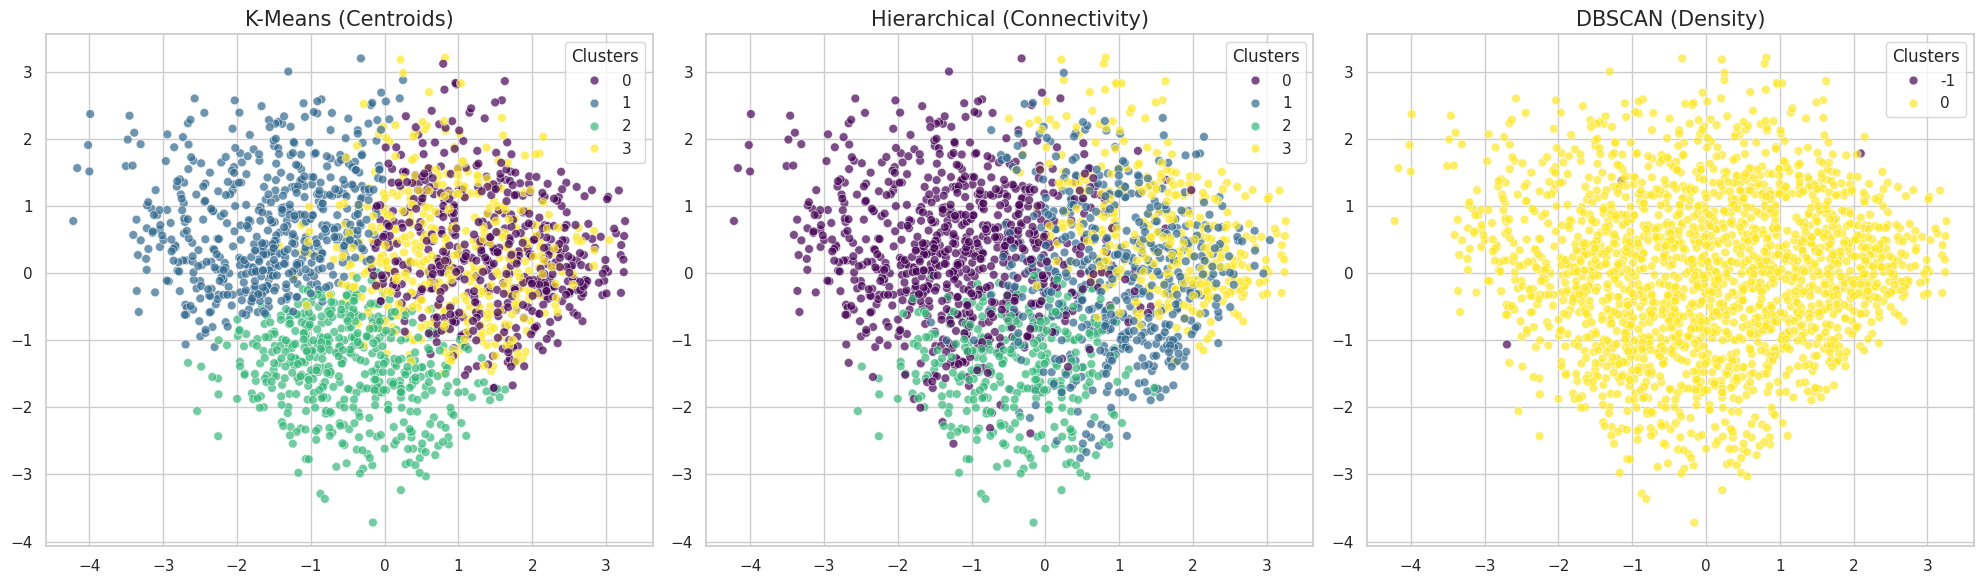


 FINAL CLUSTERING MODEL SELECTION SUMMARY
       Model  Silhouette  Davies-Bouldin  Clusters_Found
     K-Means    0.204091        1.531639               4
Hierarchical    0.145431        1.754794               4
      DBSCAN   -1.000000      999.000000               1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1. INITIALIZATION & DATA
sns.set(style="whitegrid")
try:
    df = pd.read_csv('student_lifestyle_dataset.csv')
    features = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day',
                'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day',
                'Extracurricular_Hours_Per_Day', 'GPA']
    X = df[features]
    print(" Data loaded successfully.")
except:
    print(" Dataset not found.")

# 2. PREPROCESSING (Crucial for distance-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# METHOD 1: K-MEANS (Centroid-based)
# ==========================================

wcss = []
for i in range(1, 11):
    km_temp = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    km_temp.fit(X_scaled)
    wcss.append(km_temp.inertia_)

# Visualization: Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', color='navy')
plt.title('K-Means: Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

# Final Model fitting (K=4)
km_final = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
km_labels = km_final.fit_predict(X_scaled)

# ==========================================
# METHOD 2: HIERARCHICAL (Connectivity-based)
# ==========================================

# Visualization: Dendrogram
plt.subplot(1, 2, 2)
dendrogram = sch.dendrogram(sch.linkage(X_scaled[:300], method='ward')) # Subset for clarity
plt.title('Hierarchical: Dendrogram (Subset)')
plt.xlabel('Students')
plt.ylabel('Euclidean Distances')
plt.show()

# Final Model fitting (K=4)
hc_final = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc_final.fit_predict(X_scaled)

# ==========================================
# METHOD 3: DBSCAN (Density-based)
# ==========================================
print("--- Running DBSCAN Analysis ---")
# DBSCAN finds clusters automatically based on density (eps)
db_final = DBSCAN(eps=1.2, min_samples=5)
db_labels = db_final.fit_predict(X_scaled)

# ==========================================
#  FINAL COMPARISON & METRICS
# ==========================================
def calculate_metrics(name, labels, data):
    # Check if more than 1 cluster found (DBSCAN might fail)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return {'Model': name, 'Silhouette': -1, 'Davies-Bouldin': 999, 'Clusters_Found': n_clusters}

    return {
        'Model': name,
        'Silhouette': silhouette_score(data, labels),
        'Davies-Bouldin': davies_bouldin_score(data, labels),
        'Clusters_Found': n_clusters
    }

comparison = [
    calculate_metrics('K-Means', km_labels, X_scaled),
    calculate_metrics('Hierarchical', hc_labels, X_scaled),
    calculate_metrics('DBSCAN', db_labels, X_scaled)
]

comparison_df = pd.DataFrame(comparison)

# 6. PCA VISUALIZATION (Comparison)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
labels_to_plot = [km_labels, hc_labels, db_labels]
titles = ['K-Means (Centroids)', 'Hierarchical (Connectivity)', 'DBSCAN (Density)']

for i, ax in enumerate(axes):
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_to_plot[i],
                    palette='viridis', ax=ax, s=40, alpha=0.7)
    ax.set_title(titles[i], fontsize=15)
    ax.legend(title='Clusters', loc='upper right')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print(" FINAL CLUSTERING MODEL SELECTION SUMMARY")
print("="*50)
print(comparison_df.to_string(index=False))

CLUSTERING

 Dataset successfully loaded!


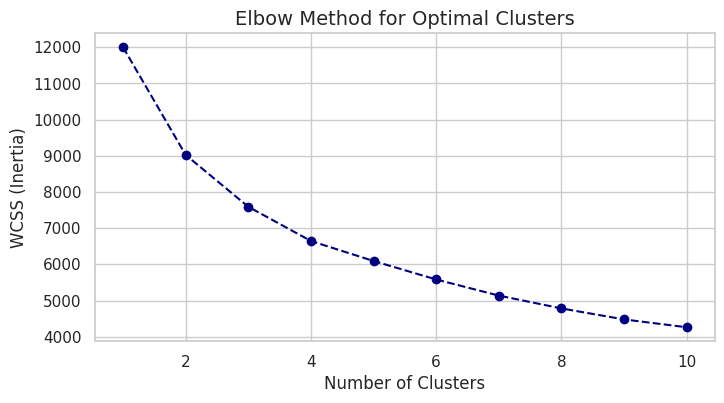

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# 1. SETUP & STYLE
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. DATA LOADING
# Ensure the file 'student_lifestyle_dataset.csv' is uploaded to your environment
try:
    df = pd.read_csv('student_lifestyle_dataset.csv')
    print(" Dataset successfully loaded!")
except FileNotFoundError:
    print(" Error: 'student_lifestyle_dataset.csv' not found. Please upload the file.")

# Selecting the numeric features for clustering
features = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day',
            'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day',
            'Extracurricular_Hours_Per_Day', 'GPA']
X = df[features]

# 3. PREPROCESSING (Scaling is essential for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. FINDING OPTIMAL K (ELBOW METHOD)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='navy')
plt.title('Elbow Method for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

# 5. K-MEANS CLUSTERING (K=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


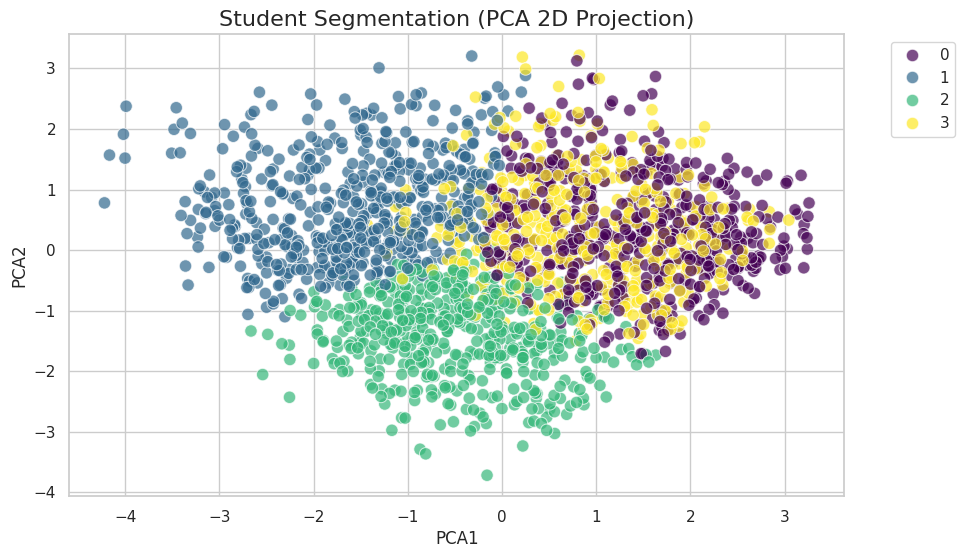

In [14]:
# 6. VISUALIZATION 1: PCA (Reducing 6D to 2D for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=80, alpha=0.7)
plt.title('Student Segmentation (PCA 2D Projection)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

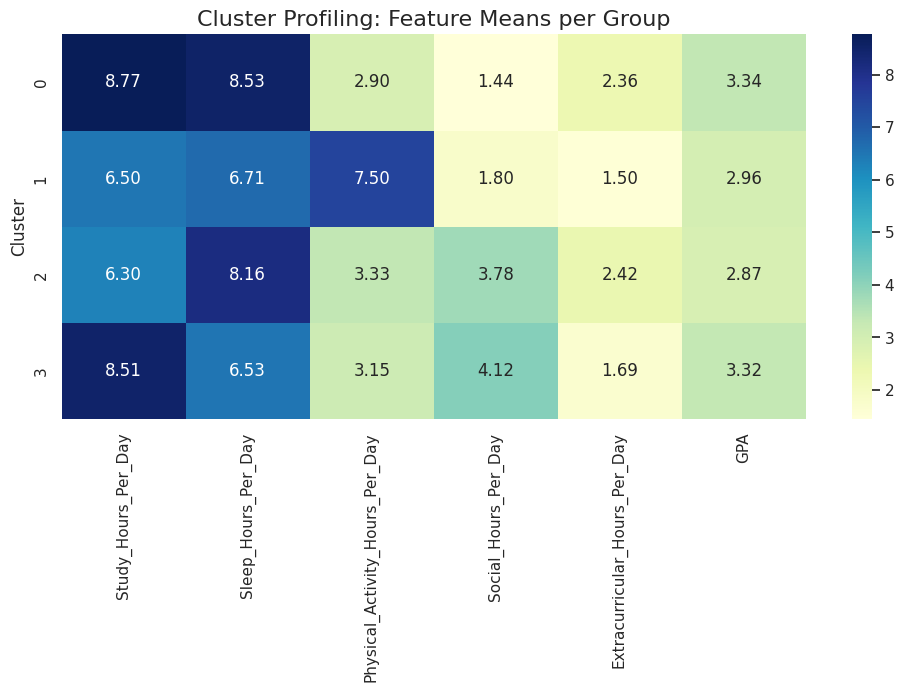

In [15]:
# 7. VISUALIZATION 2: FEATURE AVERAGES (HEATMAP)
cluster_profiles = df.groupby('Cluster')[features].mean()
plt.figure(figsize=(12, 5))
sns.heatmap(cluster_profiles, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Profiling: Feature Means per Group', fontsize=16)
plt.show()

/tmp/ipython-input-2281231719.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='flare')


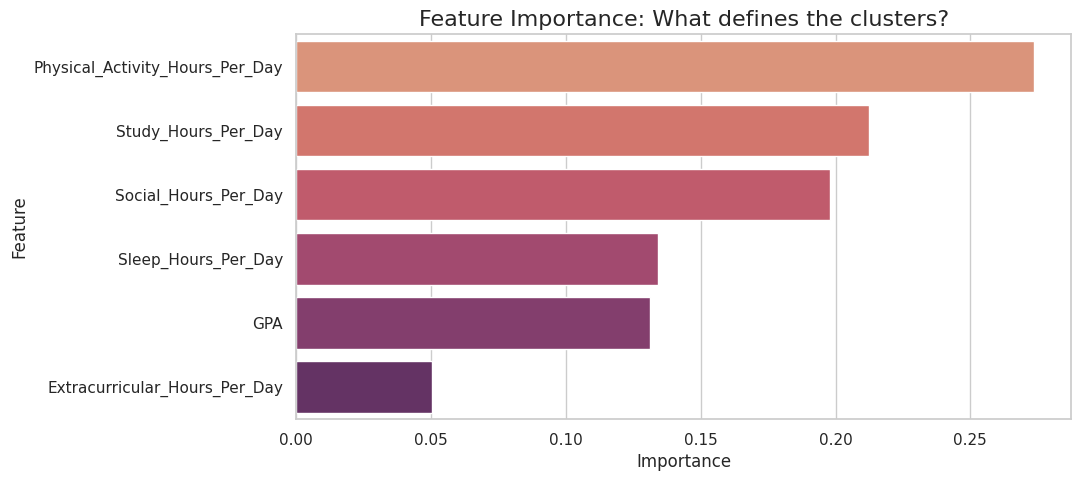

In [16]:
# 8. ENHANCEMENT: FEATURE IMPORTANCE
# Identifying which lifestyle factors are the strongest discriminators
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, df['Cluster'])

importances = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importances, palette='flare')
plt.title('Feature Importance: What defines the clusters?', fontsize=16)
plt.show()

In [17]:
# Final Summary Output
print("\n" + "="*30)
print("FINAL CLUSTER ANALYSIS SUMMARY")
print("="*30)
print(cluster_profiles)


FINAL CLUSTER ANALYSIS SUMMARY
         Study_Hours_Per_Day  Sleep_Hours_Per_Day  \
Cluster                                             
0                   8.773062             8.530233   
1                   6.496007             6.713067   
2                   6.302218             8.159879   
3                   8.511442             6.532494   

         Physical_Activity_Hours_Per_Day  Social_Hours_Per_Day  \
Cluster                                                          
0                               2.899612              1.441860   
1                               7.495644              1.795281   
2                               3.334073              3.782056   
3                               3.150114              4.118993   

         Extracurricular_Hours_Per_Day       GPA  
Cluster                                           
0                             2.355233  3.338876  
1                             1.500000  2.962704  
2                             2.421774  2.873992